<a href="https://colab.research.google.com/github/YoonSungLee/AI-Innovation-Square_Vision/blob/master/Day%205_CNN%20%EC%9D%B4%ED%95%B4%20%EB%B0%8F%20%EC%B5%9C%EC%8B%A0%20%EA%B8%B0%EC%88%A0%20%EB%8F%99%ED%96%A5/Cifar10_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

VGG의 단점 : Bottleneck<br>
<br>
(None, 224, 224, 32)<br>
(None, 112, 112, 32)<br>
(None, 112, 112, 64)

Bottleneck 해결책 : maxpooling 전에 feature의 수를 2배로 증가<br>
<br>
(None, 224, 224, 32)<br>
(None, 224, 224, 64)<br>
(None, 112, 112, 64)

In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization

import os

Using TensorFlow backend.


In [0]:
batch_size = 16
num_classes = 10
epochs = 25

In [0]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 10s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
# 정규화

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

네트워크를 직접 설계해 보세요!

In [0]:
# n_kernels을 설정하면 모델 설계 시 유용
# BatchNormalization 설정
# 모델이 깊어질 경우 dimension 주의
# Flatten 대신 GlobalAveragePooling2D 사용 가능(모델이 깊을 경우)


def create_model():
    model = Sequential()
    # N, 32, 32, 3
    model.add(Conv2D(64, (3,3), input_shape=(32, 32, 3), activation='relu',
                     kernel_initializer='he_normal'))
    # N, 30, 30, 64
    model.add(Conv2D(64, (3,3), activation='relu',
                     kernel_initializer='he_normal'))
    # N, 28, 28, 64
    model.add(MaxPooling2D())
    # N, 14, 14, 64
    model.add(Conv2D(128, (3,3), activation='relu',
                     kernel_initializer='he_normal'))
    # N, 12, 12, 128
    model.add(Conv2D(128, (3,3), activation='relu',
                     kernel_initializer='he_normal'))
    # N, 10, 10, 128
    model.add(MaxPooling2D())
    # N, 5, 5, 128
    model.add(Flatten())
    # N, 3200
    model.add(Dense(10, activation='softmax', kernel_initializer='glorot_uniform'))
    # N, 10
    
    return model

In [0]:
model = create_model()

In [0]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 10, 10, 128)       147584    
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3200)            

In [0]:
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

In [0]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [0]:
trained_model = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/25





50000/50000 [==============================] - 31s 614us/step - loss: 1.5546 - acc: 0.4409 - val_loss: 1.3253 - val_acc: 0.5186
Epoch 2/25
50000/50000 [==============================] - 17s 337us/step - loss: 1.1871 - acc: 0.5843 - val_loss: 1.1040 - val_acc: 0.6140
Epoch 3/25
50000/50000 [==============================] - 16s 329us/step - loss: 1.0195 - acc: 0.6463 - val_loss: 0.9757 - val_acc: 0.6663
Epoch 4/25
50000/50000 [==============================] - 17s 331us/step - loss: 0.9089 - acc: 0.6880 - val_loss: 0.9224 - val_acc: 0.6819
Epoch 5/25
50000/50000 [==============================] - 17s 330us/step - loss: 0.8203 - acc: 0.7179 - val_loss: 0.9179 - val_acc: 0.6826
Epoch 6/25
50000/50000 [==============================] - 16s 328us/step - loss: 0.7532 - acc: 0.7433 - val_loss: 0.8248 - val_acc: 0.7190
Epoch 7/25
500

In [0]:
epochs_range = range(25)
validation_accuracy = trained_model.history['val_acc']
training_accuracy = trained_model.history['acc']

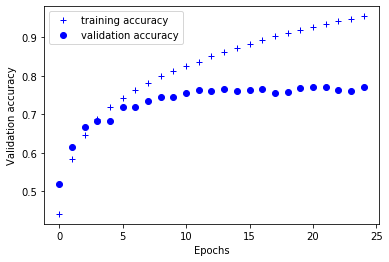

In [0]:
import matplotlib.pyplot as plt

plt.plot(epochs_range, training_accuracy, 'b+', label='training accuracy')
# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs_range, validation_accuracy, 'bo', label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation accuracy')
plt.legend()

plt.show()

In [0]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 89us/step
Test loss: 0.9507133054256439
Test accuracy: 0.7714


# Kaggle : intel image classification tutorial feedback

* activation function = 'relu' 사용 시, kernel_initialzer = he_normal 사용
* MaxPooling2D의 사이즈는 2 by 2
* Conv2D filter 사이즈는 2의 지수
* Conv2D filter 사이즈를 변수를 통해 간편하게 설정
* 마지막 Dense layer 각각 Dropout
* BatchNormalization
* Image Classification Problem : padding='valid'